<a href="https://colab.research.google.com/github/Hyuncastl/MACHINE_LEARNING/blob/main/3_27_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 분석

In [2]:
### github.com/qoonkt200/

import pandas as pd # 데이터 분석 ,인공지능 할 때 사용
import numpy as np # 수학적 계산 
import matplotlib. pyplot as plt # 데이터 시각화에 관련된 것 

In [4]:
df = pd.read_csv("/content/data_ex.csv")

# 새 섹션

In [5]:
df
df.head() #6~10개만 출력
df.info() 
#nonnull-무응딥이 아니다(답이 다 있다.)/응답   null-무응답  / nan,na - 결축치,무응답답
#int는 수치형 - 숫자로 받을 수 있음 기술적 통계 
#object는 범주형 - 숫자로 받을 수 없음.
df.shape
df.sample(7,random_state = 3)
df.sample(frac = 0.5) #퍼센트로 나타내는 법 0.5는 50%의 데이터만 나타내줌
df.count()
df.sum()
df['AGE'].sum() #지정한 항목만 sum을 하는 방법
df.describe() # 수치형 데이터의 기술 통계량
# IQR 4분위 
df[['SEX','AREA']].describe() # 범주형 데이터
df['SEX'].unique() #unique는 범주형 데이터의 레벨(종류) 수
#freg - 출연 횟수
df['SEX'].value_counts() 
df['AGE'].sort_values()
#df["AGE"].value.tolist() #나이의 값들을 리스트의 저장
#plt.hist(age,bins = 50)  # 그래프 사이의 거리 간격
# 데이터의 시각화 #hist(list) - 분포를 나타내틑것  bar(x,y) - 그래프의 x값과 y값
#plt.ylim([0,3])
#plt.xlabel("age") # x값 이름
#plt.ylabel("Num") # y값 이름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10 non-null     int64 
 1   SEX     10 non-null     object
 2   AGE     10 non-null     int64 
 3   AREA    10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


8    20
5    23
4    27
2    28
9    38
1    40
7    47
0    50
3    50
6    56
Name: AGE, dtype: int64

Text(0, 0.5, 'Num')

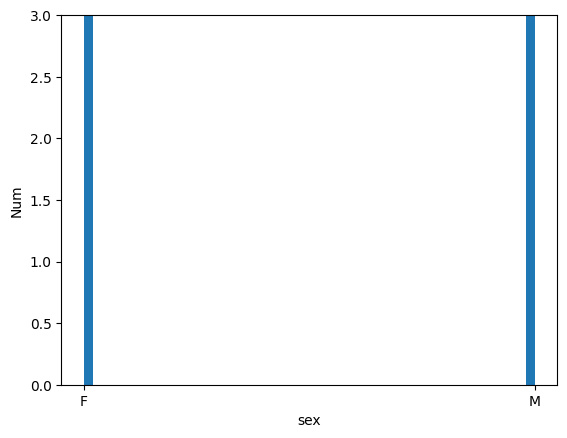

In [6]:
sex = df["SEX"].values.tolist()
plt.hist(sex,bins = 50) # 그래프 사이의 거리 간격
plt.ylim([0,3])
plt.xlabel("sex") # x값 이름
plt.ylabel("Num") # y값 이름

Text(0, 0.5, 'Num')

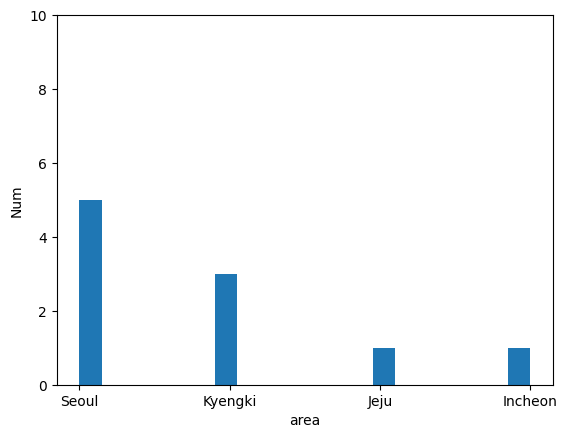

In [7]:
area = df["AREA"].values.tolist()
plt.hist(area,bins = 20) # 그래프 사이의 거리 간격
plt.ylim([0,10])
plt.xlabel("area") # x값 이름
plt.ylabel("Num") # y값 이름

In [8]:
grouped_sex = df.groupby("SEX")
print(grouped_sex)

In [9]:
for key, value in grouped_sex:
  print("key : ",key)
  print("value : ",value)

key :  F
value :     ID SEX  AGE     AREA
0   1   F   50    Seoul
2   3   F   28     Jeju
5   6   F   23    Seoul
6   7   F   56  Kyengki
7   8   F   47    Seoul
9  10   F   38  Kyengki
key :  M
value :     ID SEX  AGE     AREA
1   2   M   40  Kyengki
3   4   M   50    Seoul
4   5   M   27    Seoul
8   9   M   20  Incheon


In [10]:
df.groupby("SEX").sum()

,ID,AGE
SEX,,
F,35,242
M,20,137


In [11]:
df["중년"] = df['AGE'] > 49 # T F로만 판별별
df

,ID,SEX,AGE,AREA,중년
0,1,F,50,Seoul,True
1,2,M,40,Kyengki,False
2,3,F,28,Jeju,False
3,4,M,50,Seoul,True
4,5,M,27,Seoul,False
5,6,F,23,Seoul,False
6,7,F,56,Kyengki,True
7,8,F,47,Seoul,False
8,9,M,20,Incheon,False
9,10,F,38,Kyengki,False


In [12]:
def age_name(Age):
  name = ''
  if Age < 25 : name = '사회초년생'
  elif Age <= 35 and Age >25 : name = '사회 생활 10년차'
  elif Age <= 45 : name = "관리자 역활"
  else : name = "은퇴 예정자"
  return name

In [13]:
#apply - 반복함수 (집합, 함수 ) => 집합의 원소에 함수를  반복적으로 적용
x = df['AGE']
df["ABCD"] = df['AGE'].apply(lambda x : age_name(x))

In [14]:
file = "/content/chipotle.tsv"
chipo = pd.read_csv(file,sep = "\t")
print(chipo.shape)
print("----------------------------------------------------------")
print(chipo.info())
print("----------------------------------------------------------")
chipo.head(10)

(4622, 5)
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
----------------------------------------------------------


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [15]:
print(chipo.describe())

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


In [16]:
(chipo[["item_name","choice_description","item_price"]].describe())

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


Text(0.5, 1.0, 'Distribution of all ordered item count')

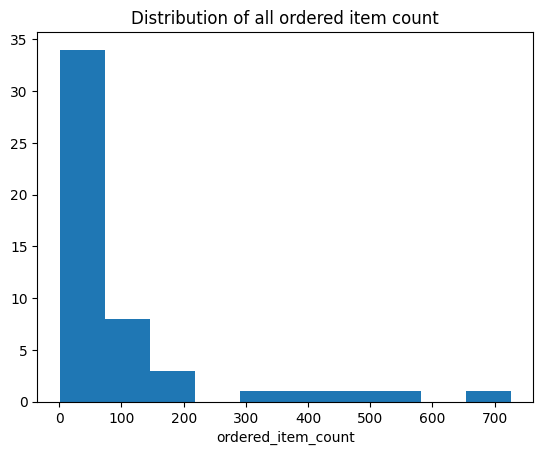

In [17]:
item_count = chipo['item_name'].value_counts()
item_count
plt.hist(item_count)
plt.xlabel("ordered_item_count")
plt.title("Distribution of all ordered item count")

In [34]:
item_name_10 = chipo['item_name'].value_counts()[:10]
item_name_10

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [35]:
item_name_1 = chipo['item_name'].value_counts()[:1]
item_name_1

Chicken Bowl    726
Name: item_name, dtype: int64

Text(0, 0.5, 'ordered_item_count')

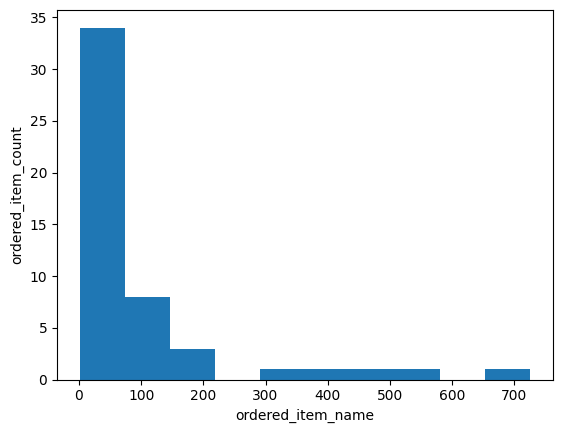

In [51]:
item_name = chipo['item_name'].value_counts()
plt.hist(item_name)
plt.xlabel("ordered_item_name")
plt.ylabel("ordered_item_count")

# 아이템당 주문 개수와 총량 구하기 
아이템 별 
grouped by를 사용. 깃허브에 찾아보면 나와 있음

In [53]:
item_quantity = chipo.groupby('item_name')['quantity'].count()
item_quantity

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [54]:
item_quantity.index
## x축

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [55]:
item_quantity.values
##Y축

array([ 54,  66,  91,  11,  10,  25, 162,   2,   6, 104, 301,  68,  59,
         7,   1,   6,  40, 726, 553,  47,   9, 110, 115, 211, 110, 479,
         1,  22,  18,  43,  48,  31,  20,   2,  20,  27,   2, 101, 211,
       368,  35,   4,  29,  55,  85,  95,   1,   6,  18,   7])

In [60]:
item_quantity_index = item_quantity.index.tolist()
len(item_quantity_index)


In [61]:
x =np.arange(len(item_quantity_index))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [62]:
order_cnt= item_quantity.values.tolist()
order_cnt

[54,
 66,
 91,
 11,
 10,
 25,
 162,
 2,
 6,
 104,
 301,
 68,
 59,
 7,
 1,
 6,
 40,
 726,
 553,
 47,
 9,
 110,
 115,
 211,
 110,
 479,
 1,
 22,
 18,
 43,
 48,
 31,
 20,
 2,
 20,
 27,
 2,
 101,
 211,
 368,
 35,
 4,
 29,
 55,
 85,
 95,
 1,
 6,
 18,
 7]

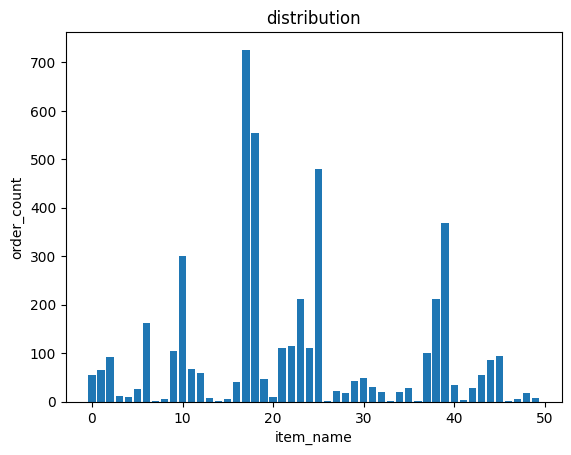

In [67]:
##bar(x,y)
plt.bar(x,order_cnt)
plt.xlabel("item_name")
plt.ylabel("order_count")
plt.title("distribution")
plt.show()

# 주문당 평균 주문 금액 계산
10달러이상 주문한 주문번호 출력
아이템별 주문 아이템
아이템별 주문 금액 분포도  

In [84]:
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [85]:
##item_price를 수치형으로 변환
x= chipo['item_price']
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))


TypeError: ignored

In [87]:
item_price = chipo.groupby('order_id')['item_price'].sum()

In [88]:
item_price_index=item_price.index.tolist()

In [90]:
x = np.arange(len(item_price_index))
x

array([   0,    1,    2, ..., 1831, 1832, 1833])

In [91]:
item_price.values

array([11.56, 16.98, 12.67, ..., 13.2 , 23.5 , 28.75])

In [92]:
item_price_values = item_price.values.tolist()

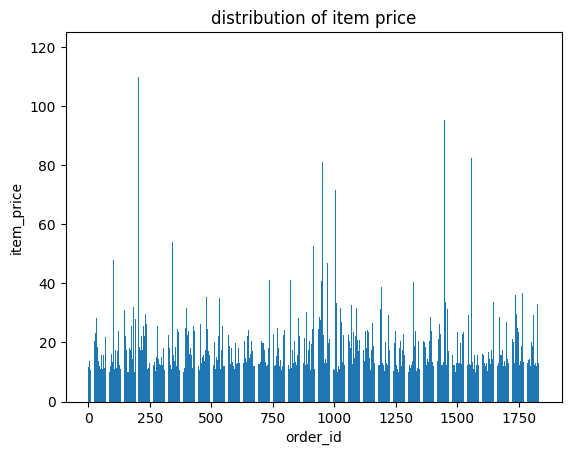

In [94]:
plt.bar(x,item_price_values)
plt. xlabel('order_id')
plt. ylabel('item_price')
plt.ylim([0,125])
plt.title('distribution of item price')
plt.show()

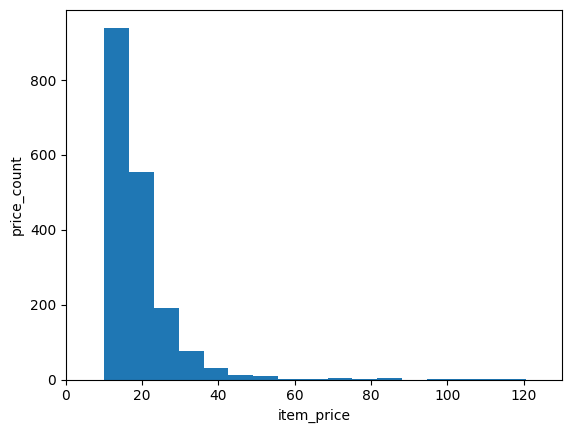

In [104]:
##4주차 과제 hist() 그리기

plt.hist(item_price,bins =30)
plt.xlim([0,130])
plt.xlabel('item_price')
plt.ylabel('price_count')
plt.show()